In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DY Fraud Detection Pickl/Dataset.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(data)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT   10039.64  C1231006920      170140.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     290.00  C1305486145         181.00   
3           1  CASH_OUT     290.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             235296.36  M1979787155            0.00            0.00        0  
1              19390.72  M2044282225           

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,10039.64,C1231006920,170140.0,235296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19390.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,290.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,290.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
data.size


10485750

In [ ]:
data.shape

(1048575, 10)

In [ ]:
data.values


array([[1, 'PAYMENT', 10039.64, ..., 0.0, 0.0, 0],
       [1, 'PAYMENT', 1864.28, ..., 0.0, 0.0, 0],
       [1, 'TRANSFER', 290.0, ..., 0.0, 0.0, 1],
       ...,
       [95, 'PAYMENT', 14140.05, ..., 0.0, 0.0, 0],
       [95, 'PAYMENT', 10020.05, ..., 0.0, 0.0, 0],
       [95, 'PAYMENT', 11450.03, ..., 0.0, 0.0, 0]], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,215567,874084,895087,978160,1114197,0
std,15,1035836,2972030,3015015,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12443,0,0,0,0,0
50%,20,80448,16002,0,126377,218260,0
75%,39,224682,137613,175617,915923,1149807,0
max,95,290006100,38900000,39000000,42100000,42200000,1


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<Axes: title={'center': 'VISUALIZATION OF MISSING VALUES'}>

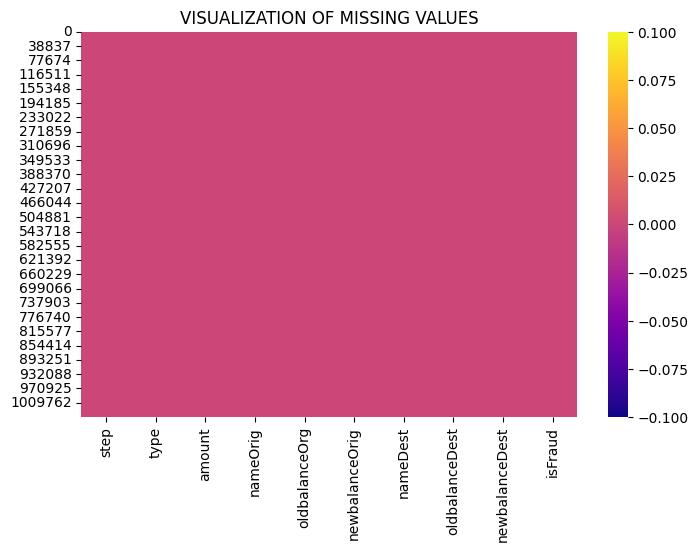

In [ ]:
# VISUALIZATION OF MISSING VALUES
plt.figure(figsize = (8,5))
plt.title ("VISUALIZATION OF MISSING VALUES")
sns.heatmap(data.isnull(), cbar=True, cmap="plasma")

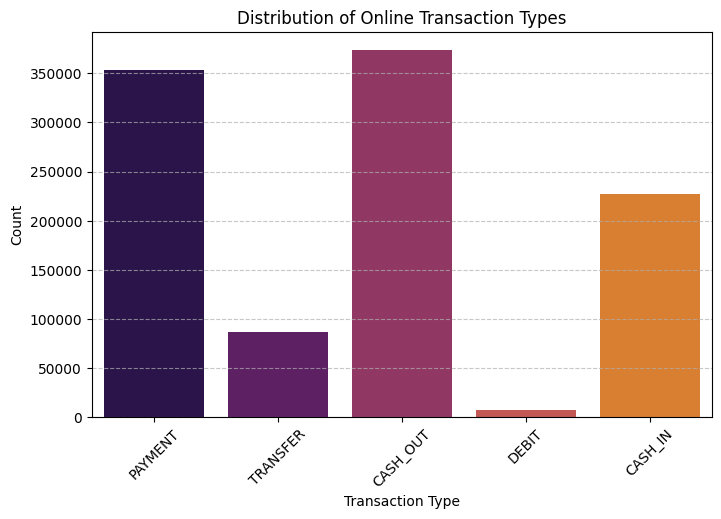

In [ ]:
colors = sns.color_palette("inferno")
plt.figure(figsize=(8, 5))
sns.countplot(x="type", data=data, palette=colors)
plt.title("Distribution of Online Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()

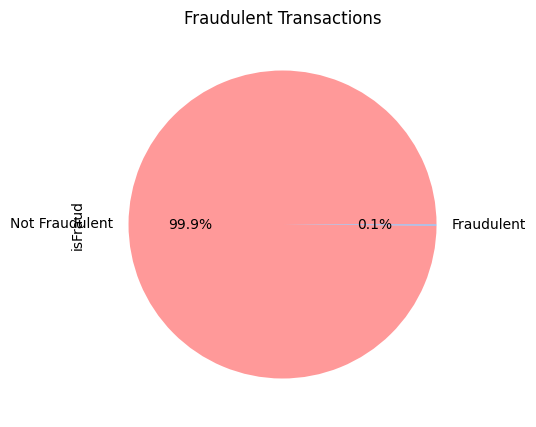

In [ ]:
colors = ['#ff9999', '#66b3ff']

# Create visualization for Fraudulent Transactions
plt.figure(figsize=(8, 5))
plt.title("Fraudulent Transactions")
data['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Fraudulent', 'Fraudulent'], colors=colors)
plt.show()


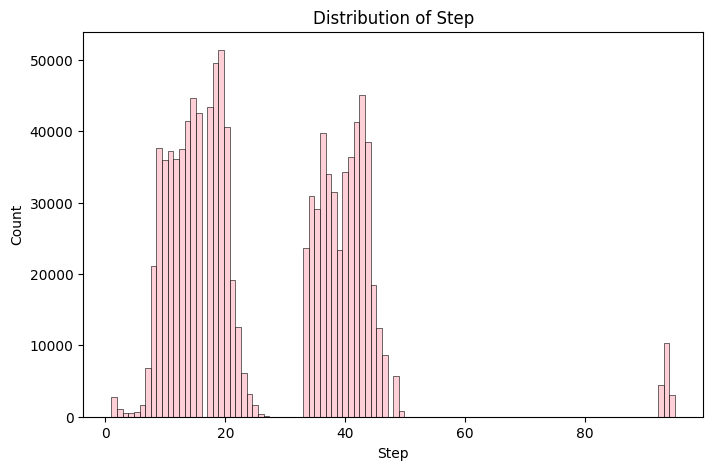

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['step'], bins=100, color='pink')
plt.title("Distribution of Step")
plt.xlabel("Step")
plt.ylabel("Count")
plt.show()

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,10039.64,C1231006920,170140.0,235296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19390.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,290.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,290.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Transaction_Label
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,Not Fraudulent
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,Not Fraudulent
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,Not Fraudulent
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,Not Fraudulent
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,Not Fraudulent


In [ ]:
data.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'Transaction_Label'],
      dtype='object')

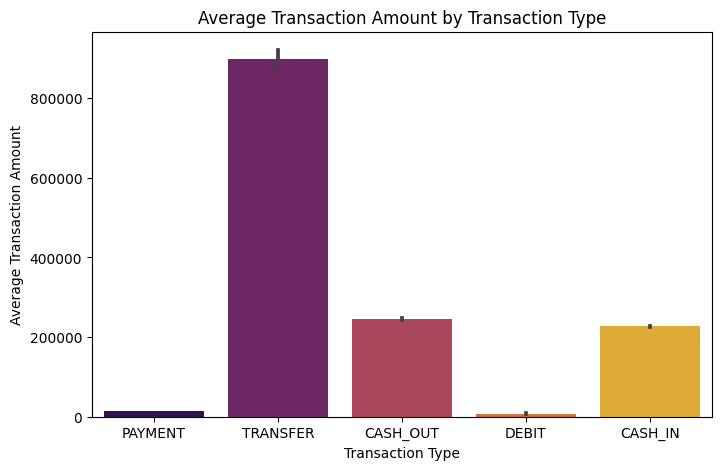

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='amount', data=data, palette='inferno')
plt.title("Average Transaction Amount by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Average Transaction Amount")
plt.show()


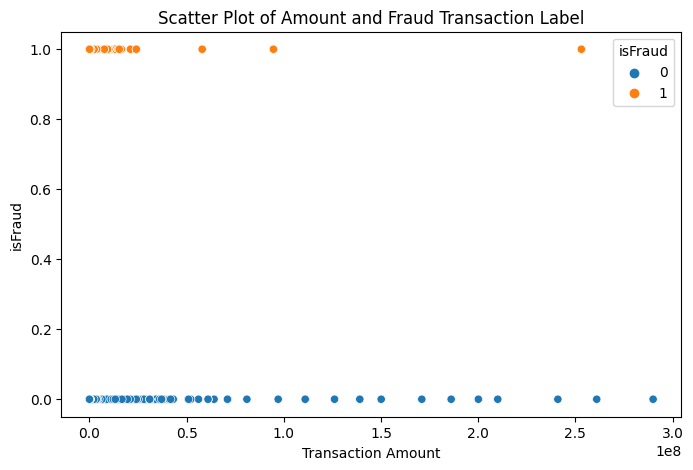

In [ ]:
# Visualization between amount and fraud_transaction_label
plt.figure(figsize=(8, 5))
sns.scatterplot(x='amount', y='isFraud', data=data, hue='isFraud')
plt.xlabel('Transaction Amount')
plt.ylabel('isFraud')
plt.title('Scatter Plot of Amount and Fraud Transaction Label')
plt.show()


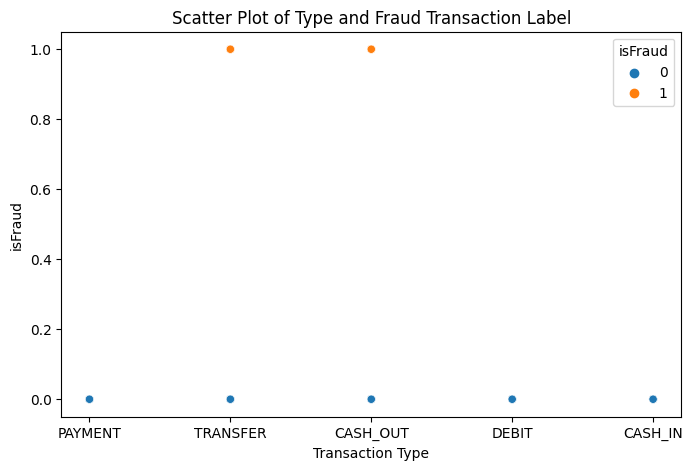

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='type', y='isFraud', data=data, hue='isFraud')
plt.xlabel('Transaction Type')
plt.ylabel('isFraud')
plt.title('Scatter Plot of Type and Fraud Transaction Label')
plt.show()


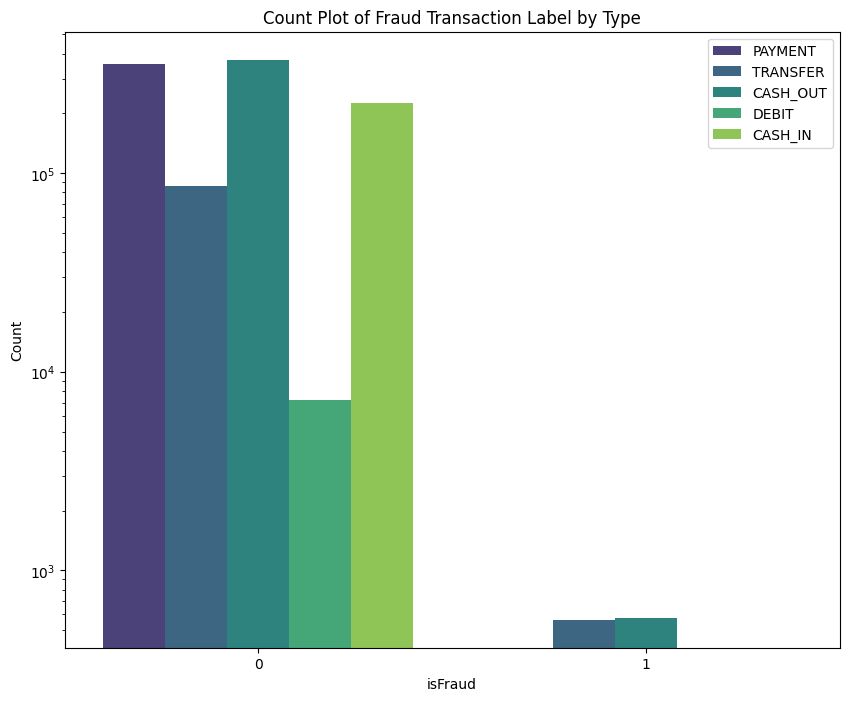

In [ ]:
# Visualization between type and isFraud with increased count scale
plt.figure(figsize=(10, 8))
sns.countplot(x='isFraud', data=data, hue='type', palette='viridis')
plt.legend(loc='upper right')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title('Count Plot of Fraud Transaction Label by Type')
plt.yscale('log')  # Increase count scale using logarithmic scale
plt.show()


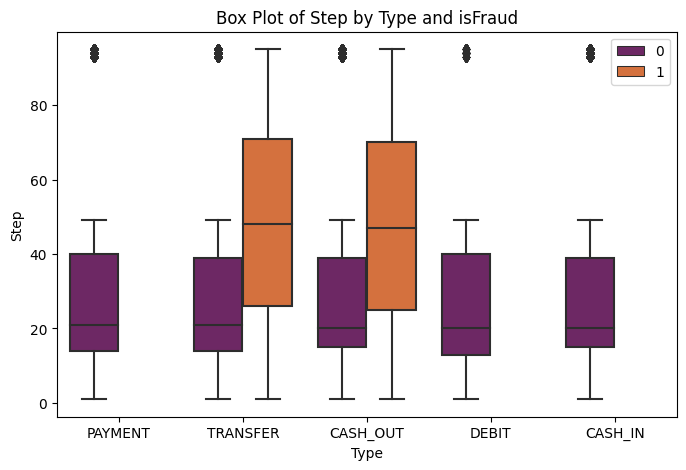

In [ ]:
# Visualizing the relationship between step, type, and isFraud
plt.figure(figsize=(8, 5))
sns.boxplot(x="type", y="step", hue="isFraud", data=data, palette="inferno")
plt.xlabel('Type')
plt.ylabel('Step')
plt.title('Box Plot of Step by Type and isFraud')
plt.legend(loc='upper right')
plt.show()


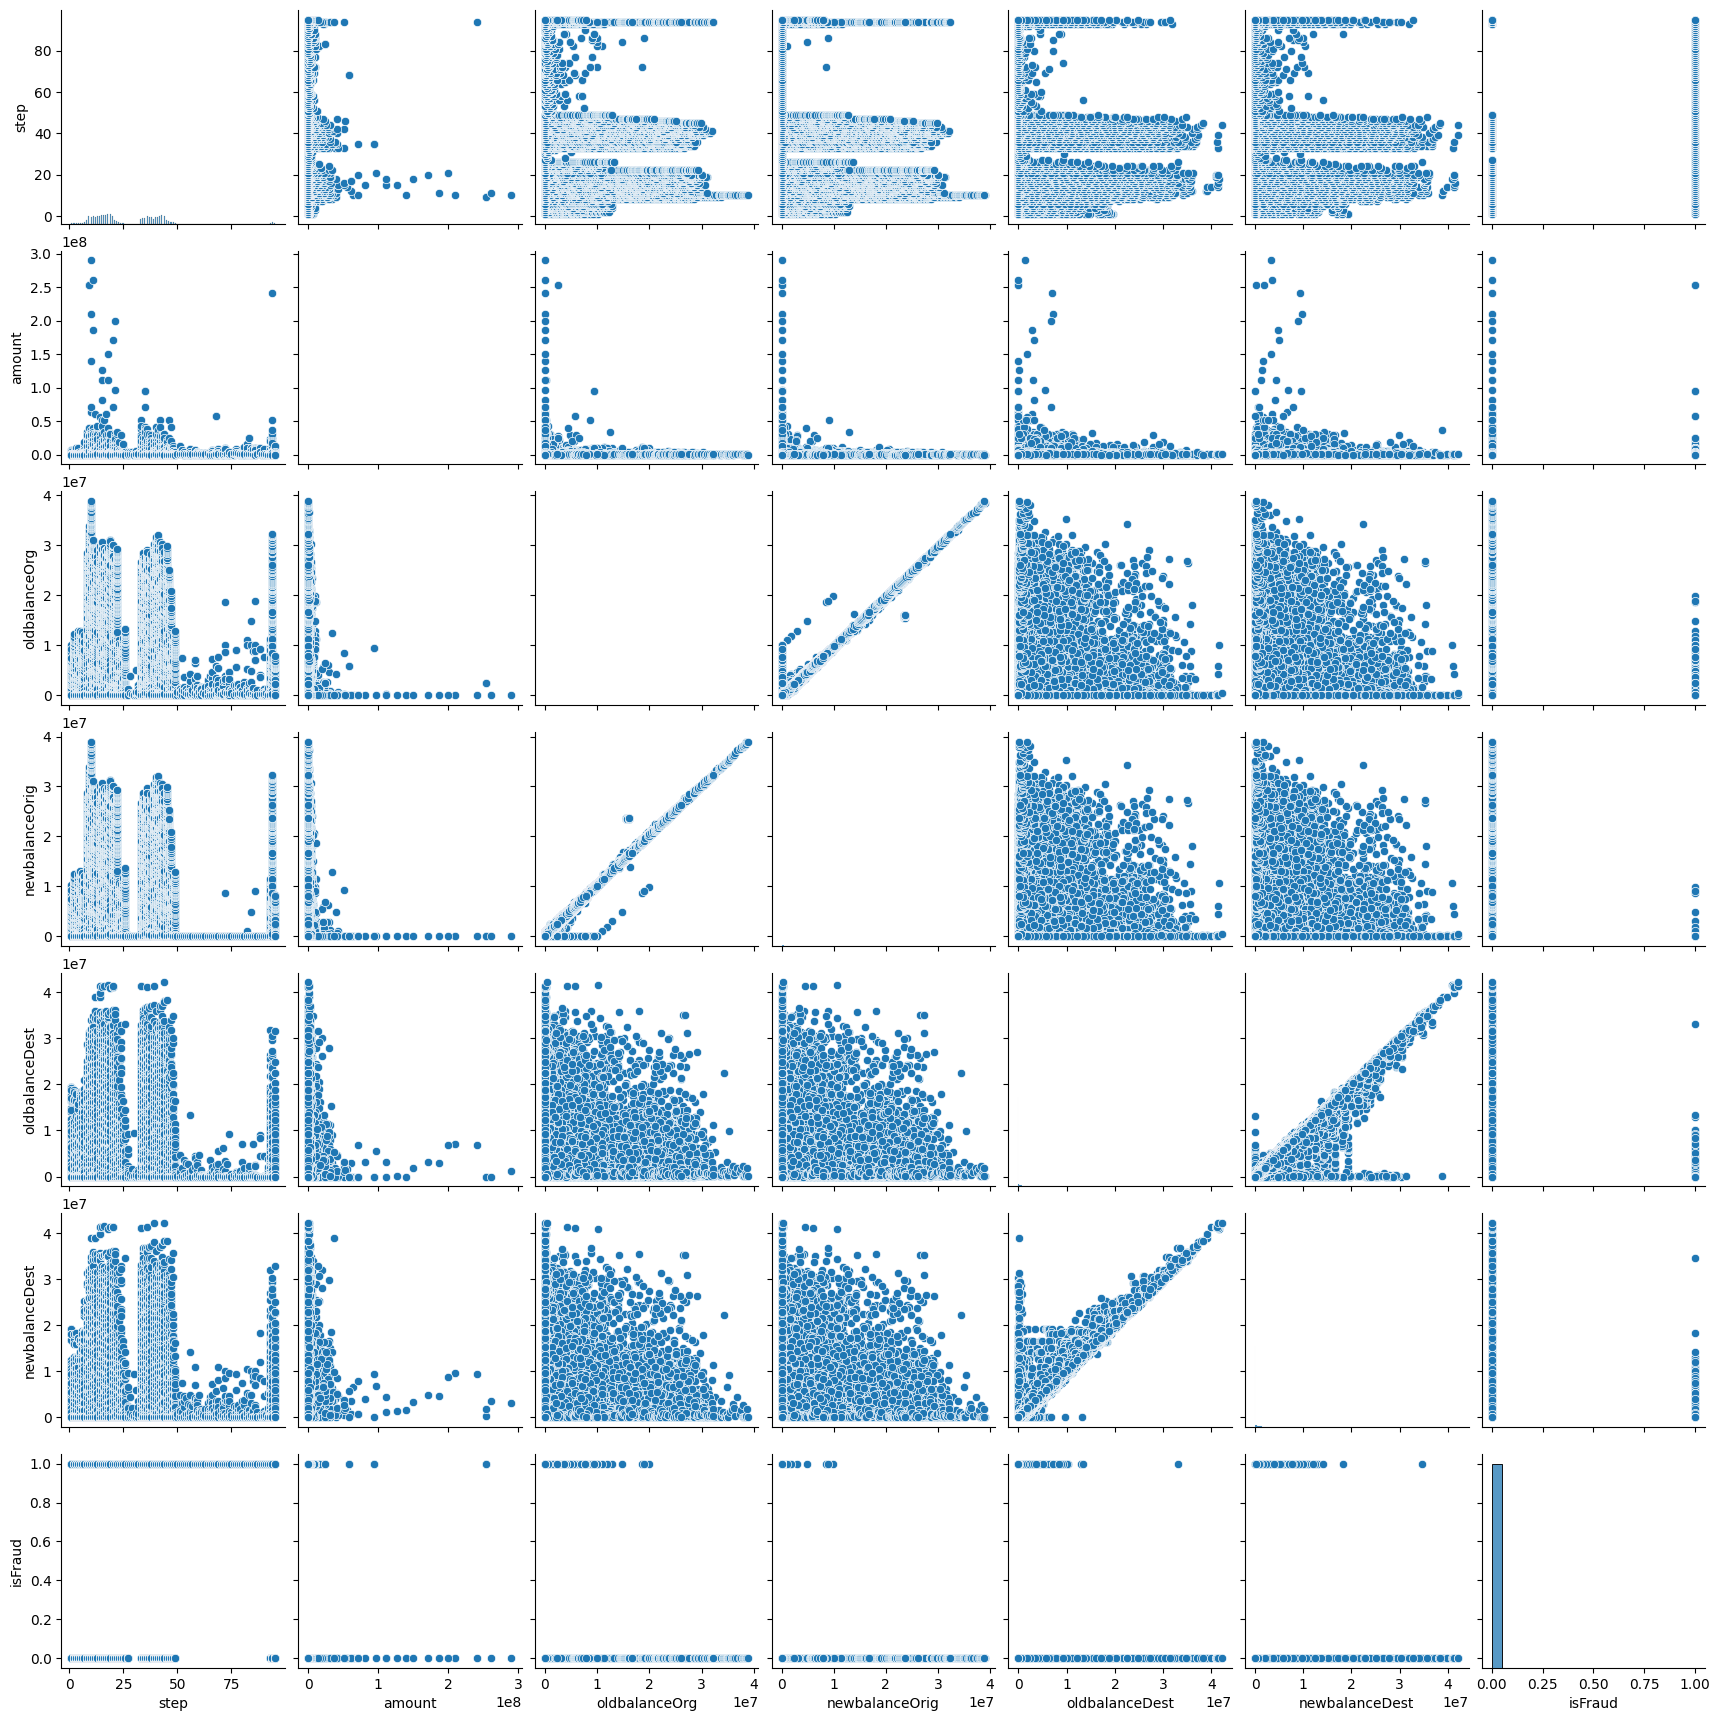

In [ ]:
sns.pairplot(data)

<ipython-input-94-f469e8f8dc25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


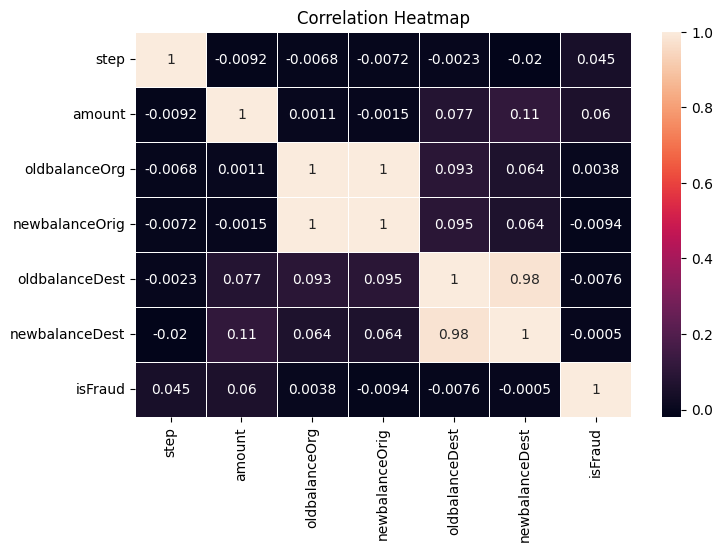

In [ ]:
correlation = data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
categorical = ['type']
categories_dummies = pd.get_dummies(data[categorical])
print(categories_dummies.head())


   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER
0             0              0           0             1              0
1             0              0           0             1              0
2             0              0           0             0              1
3             0              1           0             0              0
4             0              0           0             1              0


In [ ]:
data = pd.concat([data,categories_dummies], axis=1)
print(data.shape)

(1048575, 15)


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,10039.64,C1231006920,170140.0,235296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19390.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,290.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,290.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [ ]:
data.drop(categorical, axis = 1, inplace = True)
data.drop(columns=['nameOrig', 'nameDest'], inplace=True)


In [ ]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,10039.64,170140.0,235296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19390.72,0.0,0.0,0,0,0,0,1,0
2,1,290.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,290.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X = data.drop(columns=['isFraud'])
y = data['isFraud']

In [ ]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,10039.64,170140.00,235296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19390.72,0.00,0.00,0,0,0,1,0
2,1,290.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,290.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [ ]:
DT = DecisionTreeClassifier(random_state=2)
RF = RandomForestClassifier(random_state=2)
LR = LogisticRegression(random_state=2)
KN = KNeighborsClassifier()


In [ ]:
models = [DT,RF,LR,KN]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, prediction):
    # Compute the confusion matrix
    cm_ = confusion_matrix(y_test, prediction)

    # Create the plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_, cmap='rainbow', linecolor='white', linewidths=1, annot=True)

    # Add labels and title
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Display the plot
    plt.show()


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create function to train a model and evaluate accuracy
def trainer(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the fitted model
    prediction = model.predict(X_test)

    # Print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_test)))
    print(classification_report(y_test, prediction))  # Use this later

    # Plot the confusion matrix
    plot_confusion_matrix(y_test, prediction)



For DecisionTreeClassifier, Accuracy score is 0.9996026359541347 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314233
           1       0.82      0.81      0.81       340

    accuracy                           1.00    314573
   macro avg       0.91      0.90      0.91    314573
weighted avg       1.00      1.00      1.00    314573



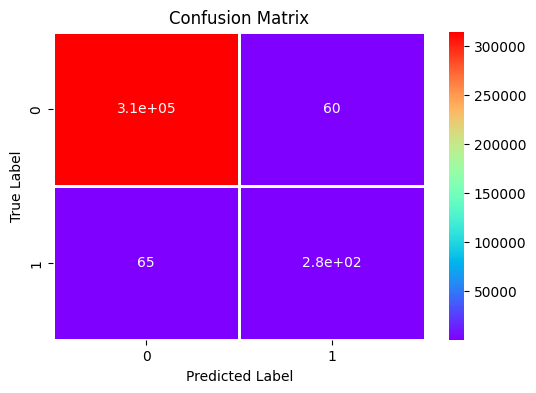


For RandomForestClassifier, Accuracy score is 0.999755223747747 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314233
           1       0.98      0.79      0.87       340

    accuracy                           1.00    314573
   macro avg       0.99      0.89      0.94    314573
weighted avg       1.00      1.00      1.00    314573



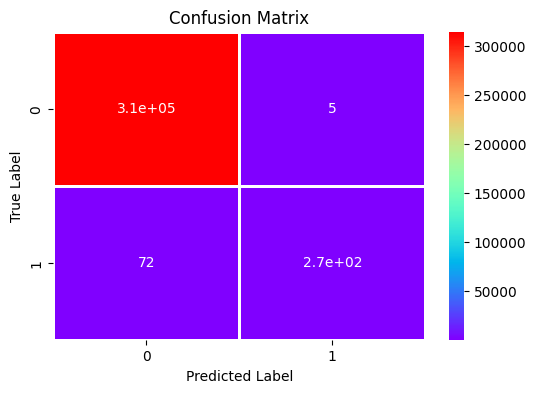


For LogisticRegression, Accuracy score is 0.9987792976511016 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314233
           1       0.40      0.27      0.33       340

    accuracy                           1.00    314573
   macro avg       0.70      0.64      0.66    314573
weighted avg       1.00      1.00      1.00    314573



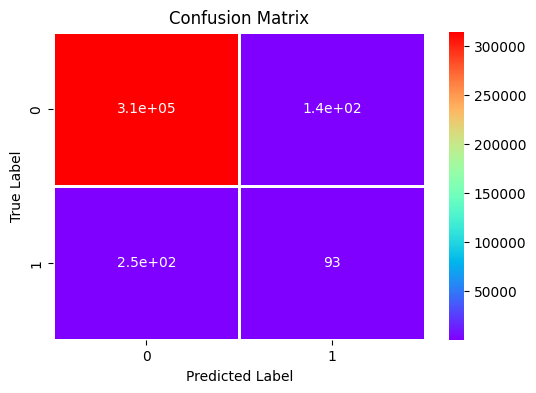


For KNeighborsClassifier, Accuracy score is 0.99938011208845 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314233
           1       0.83      0.54      0.65       340

    accuracy                           1.00    314573
   macro avg       0.91      0.77      0.83    314573
weighted avg       1.00      1.00      1.00    314573



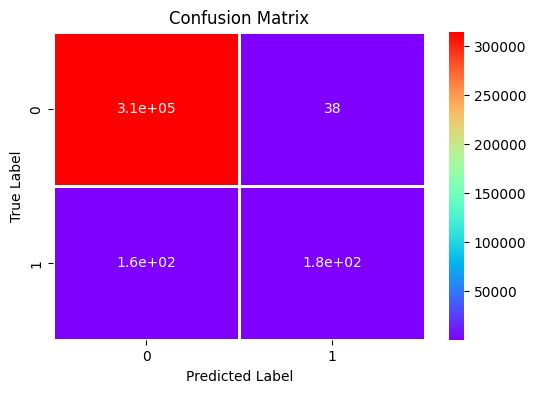

In [ ]:
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_validate

# Perform cross-validation on the Decision Tree model
DT_scores = cross_validate(DT, X_test, y_test, scoring='recall_macro')

# Perform cross-validation on the Random Forest model
RF_scores = cross_validate(RF, X_test, y_test, scoring='recall_macro')

# Calculate the mean recall score for each model
mean_DT_recall = np.mean(DT_scores['test_score'])
mean_RF_recall = np.mean(RF_scores['test_score'])

# Print the mean recall scores for each model
print('Decision Tree Recall Cross-Validation:', mean_DT_recall)
print('Random Forest Recall Cross-Validation:', mean_RF_recall)


Decision Tree Recall Cross-Validation: 0.8763066972668836
Random Forest Recall Cross-Validation: 0.8720556411470802
